In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
mp_key = "bsvkvKtIeOMa1amMu5ZlNLCEpRMHPSeb"
mp_id = "mp-505297"

In [3]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
xrd = XRDCalculator("CuKa1")


In [26]:
xrd_pattern = xrd.get_pattern(conv_struc , scaled=True, two_theta_range=(0, 90))
scale = (xrd_pattern.x)[0:3] #angle
intensity = (xrd_pattern.intensity)[0:3] #intensité
hkls = xrd_pattern.hkls[0:3] #plan hkl
d_hkl = xrd_pattern.d_hkls

for i in range(len(scale)): #print des résultats
    print("Le pic de diffraction "+str(i + 1)+" est associé à : \n")
    print("  Angle 2\u03B8 = "+str(scale[i])+"°\n")
    print("  Intensité = "+str(intensity[i])+" sur une échelle de 100\n")
    print("  (h,k,l) = "+str(hkls[i][0].get("hkl"))+" de multiplicité "+str(hkls[i][0].get("multiplicity"))+"\n")
    print("  Distance associée :" ,str(d_hkl[i]), " Å")
    print("\n")

Le pic de diffraction 1 est associé à : 

  Angle 2θ = 24.952529451622404°

  Intensité = 28.72210763355789 sur une échelle de 100

  (h,k,l) = (1, 1, 1) de multiplicité 8

  Distance associée : 3.5655307833487617  Å


Le pic de diffraction 2 est associé à : 

  Angle 2θ = 28.890636326014583°

  Intensité = 16.738308867444406 sur une échelle de 100

  (h,k,l) = (2, 0, 0) de multiplicité 6

  Distance associée : 3.0878402363554565  Å


Le pic de diffraction 3 est associé à : 

  Angle 2θ = 41.31537546717483°

  Intensité = 100.0 sur une échelle de 100

  (h,k,l) = (2, 2, 0) de multiplicité 12

  Distance associée : 2.1834327703476153  Å




Intensité des trois premiers pics en fonction des angles pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å


<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

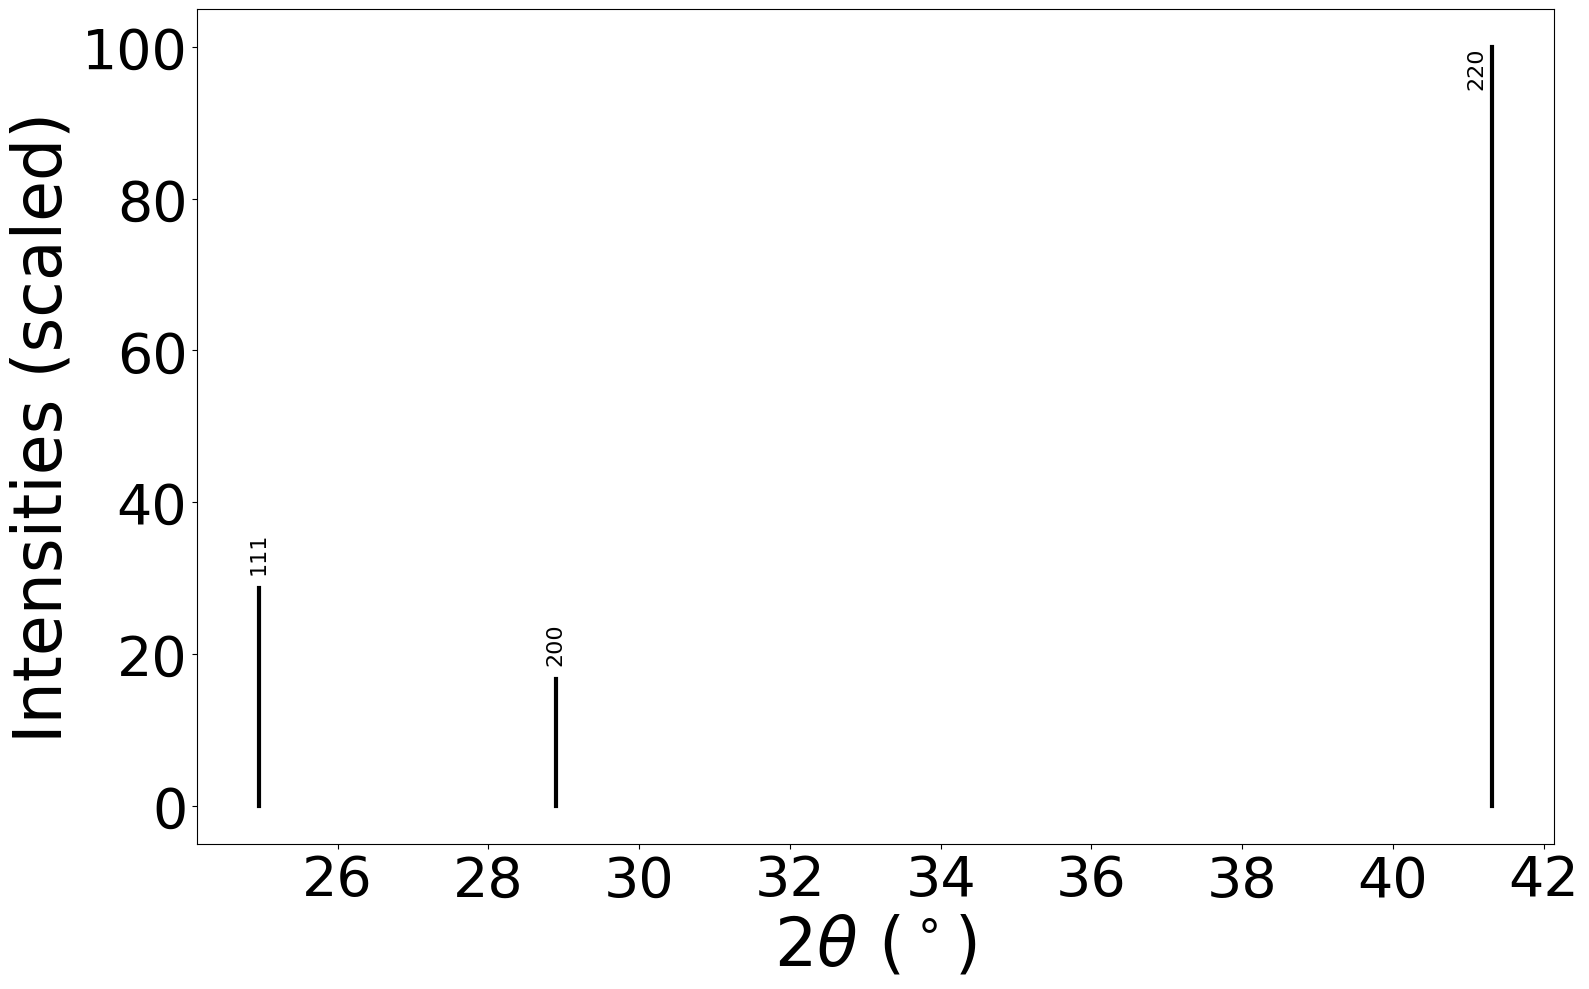

In [18]:
print("Intensité des trois premiers pics en fonction des angles pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å")
xrd.get_plot(conv_struc,two_theta_range=(0,45))  